<a href="https://colab.research.google.com/github/juliocesarortiz/DataScience/blob/main/Colab_DSA11_08_Act%C3%ADvate_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA:
## **TEMA 2: Herramientas para crear visualizaciones de textos.** *texto en cursiva*

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PRACTICA: Tema 2: Herramientas para crear visualizaciones de textos.

### Instrucciones




1. Revisa la documentación relacionada con los datos que vamos a trabajar y has un breve resumen sobre las variables que tiene el conjunto de datos:

COVID19 Tweets: https://www.kaggle.com/gpreda/covid19-tweets

__Aquí va tu descripción__


2. Importa las paqueterías necesarias para hacer el análisis


In [5]:
# Recuerda instalar todas las librerías necesarias:
#
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

3. Lee los datos de Covid-tweets y analiza las columnas que tienes:

In [14]:
import pandas as pd
datos = pd.read_csv('/content/covid19_tweets.csv')
datos.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


4. Con el corpus cargado crea un pipelina con las siguiente operaciones

In [24]:
# Convertir a minúsculas cada uno de los tweets, AND SHOW THE FIRST 10

datos['text'] = datos['text'].str.lower()
print(datos['text'].head(10))

0    if i smelled the scent of hand sanitizers toda...
1    hey @yankees @yankeespr and @mlb - wouldn't it...
2    @diane3443 @wdunlap @realdonaldtrump trump nev...
3    @brookbanktv the one gift #covid19 has give me...
4    25 july : media bulletin on novel #coronavirus...
5    #coronavirus #covid19 deaths continue to rise....
6    how #covid19 will change work in general (and ...
7    you now have to wear face coverings when out s...
8    praying for good health and recovery of @chouh...
9    pope as god - prophet sadhu sundar selvaraj. w...
Name: text, dtype: object


In [28]:

# Tokenizar cada tweet y remover las letras @ y #
import re

def tokenize_tweet(tweet):
  tweet = re.sub(r'[@#]', '', tweet)  # Remove @ and # symbols
  tokens = tweet.split()
  return tokens

datos['tokens'] = datos['text'].apply(tokenize_tweet)
print(datos['tokens'].head(10))

0    [if, i, smelled, the, scent, of, hand, sanitiz...
1    [hey, yankees, yankeespr, and, mlb, -, wouldn'...
2    [diane3443, wdunlap, realdonaldtrump, trump, n...
3    [brookbanktv, the, one, gift, covid19, has, gi...
4    [25, july, :, media, bulletin, on, novel, coro...
5    [coronavirus, covid19, deaths, continue, to, r...
6    [how, covid19, will, change, work, in, general...
7    [you, now, have, to, wear, face, coverings, wh...
8    [praying, for, good, health, and, recovery, of...
9    [pope, as, god, -, prophet, sadhu, sundar, sel...
Name: tokens, dtype: object


In [52]:
# prompt: Tokenizar cada tweet y remover las letras @ y #, hazlo de manera que se puedan agregar mas palabras y o caracteres si es necesario desoues

def tokenize_tweet(tweet):
  tweet = re.sub(r'[@#]', '', tweet)  # Remove @ and # symbols
  tweet = re.sub(r'[-]', '', tweet)
  tweet = re.sub(r'[/]', '', tweet)
  tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # Remove URLs
  tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
  tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
  tweet = re.sub(r'\s+', ' ', tweet)  # Remove extra spaces
  tweet = re.sub(r'\b\w{1,2}\b', '', tweet)  # Remove single-letter words
  tweet = re.sub(r'http\S+', '', tweet)
  tokens = tweet.split()
  return tokens

datos['tokens'] = datos['text'].apply(tokenize_tweet)
print(datos['tokens'].head(10))

0    [smelled, the, scent, hand, sanitizers, today,...
1    [hey, yankees, yankeespr, and, mlb, wouldnt, h...
2    [diane, wdunlap, realdonaldtrump, trump, never...
3    [brookbanktv, the, one, gift, covid, has, give...
4    [july, media, bulletin, novel, coronavirusupda...
5    [coronavirus, covid, deaths, continue, rise, i...
6    [how, covid, will, change, work, general, and,...
7    [you, now, have, wear, face, coverings, when, ...
8    [praying, for, good, health, and, recovery, ch...
9    [pope, god, prophet, sadhu, sundar, selvaraj, ...
Name: tokens, dtype: object


In [53]:
# remover las stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

datos['tokens_without_stopwords'] = datos['tokens'].apply(remove_stopwords)

print(datos[['text', 'tokens', 'tokens_without_stopwords']].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  if i smelled the scent of hand sanitizers toda...   
1  hey @yankees @yankeespr and @mlb - wouldn't it...   
2  @diane3443 @wdunlap @realdonaldtrump trump nev...   
3  @brookbanktv the one gift #covid19 has give me...   
4  25 july : media bulletin on novel #coronavirus...   
5  #coronavirus #covid19 deaths continue to rise....   
6  how #covid19 will change work in general (and ...   
7  you now have to wear face coverings when out s...   
8  praying for good health and recovery of @chouh...   
9  pope as god - prophet sadhu sundar selvaraj. w...   

                                              tokens  \
0  [smelled, the, scent, hand, sanitizers, today,...   
1  [hey, yankees, yankeespr, and, mlb, wouldnt, h...   
2  [diane, wdunlap, realdonaldtrump, trump, never...   
3  [brookbanktv, the, one, gift, covid, has, give...   
4  [july, media, bulletin, novel, coronavirusupda...   
5  [coronavirus, covid, deaths, continue, rise,

5. Crea las gráficas para obtener lo siguiente:

__¡Importante!__ A diferencia del libro que has procesado, en los tweets puedes tener tokens como: @brookbanktv o  #COVID19, revisa si al momento de tokenizar se han reprocesado correctamente.


<Axes: title={'center': 'Conteo de Caracteres por Tweet'}, ylabel='Frequency'>

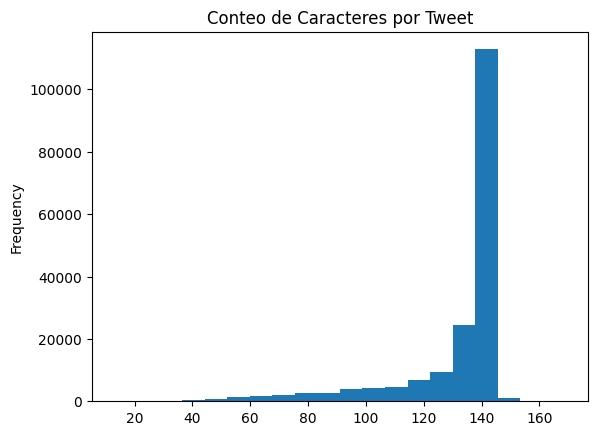

In [54]:
# prompt: # Grafica el conteo de caracteres por cada tweet

# Grafica el conteo de caracteres por cada tweet
datos['char_count'] = datos['text'].str.len()
datos['char_count'].plot(kind='hist', bins=20, title='Conteo de Caracteres por Tweet')


<Axes: title={'center': 'Conteo de Tokens por Tweet'}, ylabel='Frequency'>

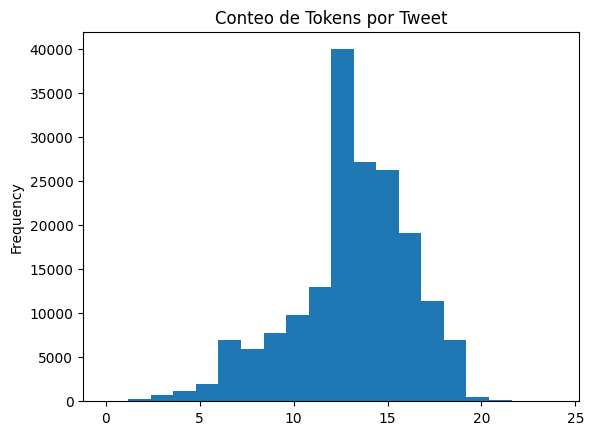

In [55]:
# prompt: #Grafica el conteo de tokens por cada tweets

datos['token_count'] = datos['tokens'].apply(len)
datos['token_count'].plot(kind='hist', bins=20, title='Conteo de Tokens por Tweet')

6. Ahora procesa los tweets para obtener lo siguiente:



In [ ]:
#Gráfica con las palabras más comúnes de todo el corpus

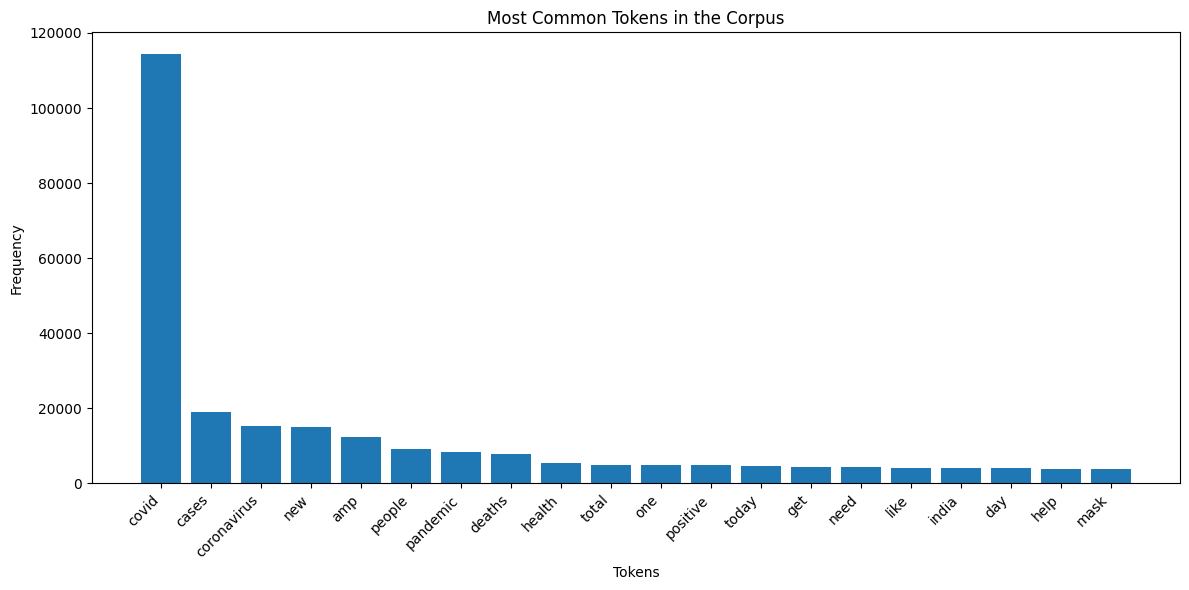

In [56]:
# prompt: #Gráfica con las palabras más comúnes de todo el corpus

from collections import Counter

# Flatten the list of tokens_without_stopwords into a single list
all_tokens = [token for sublist in datos['tokens_without_stopwords'] for token in sublist]

# Count the frequency of each token
token_counts = Counter(all_tokens)

# Get the most common tokens
most_common_tokens = token_counts.most_common(20)  # Change 20 to the desired number of tokens

# Create a bar chart
import matplotlib.pyplot as plt

tokens, counts = zip(*most_common_tokens)
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Most Common Tokens in the Corpus')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Gráfica con las palabras menos comúnes de todo el corpus

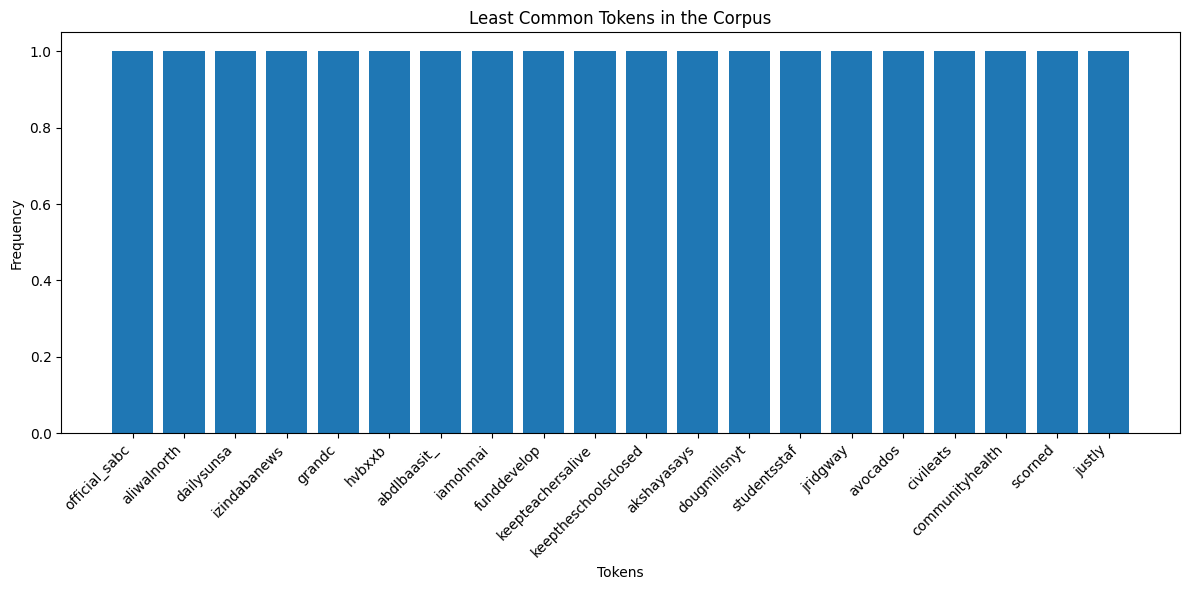

In [57]:
# prompt: #Gráfica con las palabras menos comúnes de todo el corpus

# Get the least common tokens
least_common_tokens = token_counts.most_common()[:-21:-1]  # Change 20 to the desired number of tokens

# Create a bar chart
tokens, counts = zip(*least_common_tokens)
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Least Common Tokens in the Corpus')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

7. Crea las nubes de palabras del corpus:
¿Cuáles son los temas principales de los tweets?


In [ ]:
# crea la nube de palabras-

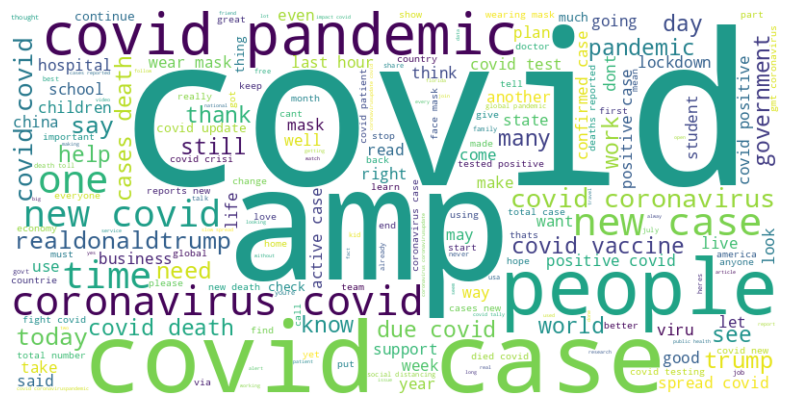

In [58]:
# prompt: # crea la nube de palabras

from wordcloud import WordCloud

# Create a string of all tokens without stopwords
all_tokens_string = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_string)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__¡God Job!!__